## Read Data 

In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/big_data.csv')
pd.DataFrame.from_records(data)
data.shape

(177512, 382)

In [5]:
data.head(10)

,arr_delay,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,-7,270,0,0,0,0,0,0,0,13,36.6,33.4,1022.4,984.4,5.9,3.3,0.00,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1995,0,0,0,0,0,0,0,24,48.3,36.9,1020.3,1008.4,10.0,3.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,621,0,0,0,0,0,0,0,17,65.1,49.0,1016.4,977.5,10.0,3.2,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-33,2065,0,0,0,0,0,0,0,1,55.3,45.5,1021.8,944.7,10.0,4.2,0.11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-19,1771,0,0,0,0,0,0,0,10,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,-10,516,0,0,0,0,0,0,0,17,50.0,48.1,1023.4,986.2,2.9,6.8,0.95,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-21,2267,0,0,0,0,0,0,0,8,61.6,56.2,1019.9,1018.9,8.6,1.7,0.36,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,-19,228,0,0,0,0,0,0,0,5,30.1,22.8,1011.7,980.4,10.0,7.6,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,715,0,0,0,0,0,0,0,27,37.3,26.9,1012.9,878.3,9.8,6.3,0.00,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,-15,919,0,0,0,0,0,0,0,12,17.3,-6.1,1032.9,1030.6,10.0,10.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Creating Train and Validation Set

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.2, random_state = 2)

## Classify Target and Variables 

**Depart Delay Prediction (total_dep_delay). Remove arr_delay**




Training set Y 

In [25]:
Y_train=data_train.loc[:,'total_dep_delay']
Y_train

144973     5
81687     18
82222      6
67443     13
69780     22
          ..
162091     1
175638     6
95816     25
100879    34
89256      5
Name: total_dep_delay, Length: 142009, dtype: int64

Training set Variables 

In [0]:
X_train = data_train.loc[:, ~data_train.columns.isin(['total_dep_delay', 'arr_delay'])]

Testting set Y

In [0]:
X_test=data_val.loc[:, ~data_train.columns.isin(['total_dep_delay', 'arr_delay'])]

In [28]:
Y_test=data_val.loc[:,'total_dep_delay']
Y_test

83248      6
174977    11
135504    31
165845    30
166320    11
          ..
150271    48
106286    12
174602    49
154525    18
99932     14
Name: total_dep_delay, Length: 35503, dtype: int64

## Lasso Regression

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from scipy.stats import skew
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
%matplotlib inline
from subprocess import check_output  


In [0]:
#alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [31]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)
rmse_cv(model_lasso).mean()

30.739808992782734

In [32]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
coef.sort_values().head(5)

Hawaiian     -9.323560
origin_BIL   -9.106196
origin_FNT   -8.995683
origin_ORH   -8.498382
dest_MVY     -5.775615
dtype: float64

In [33]:
coef.sort_values().tail(10)

origin_MIA     9.800558
origin_FAT    11.126821
dest_GJT      11.362758
origin_SFO    12.301343
dest_LBE      12.437778
origin_EWR    13.260974
origin_RFD    15.042174
origin_LGA    15.193369
origin_JFK    15.730019
origin_GRI    25.737212
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model (departure delay)')

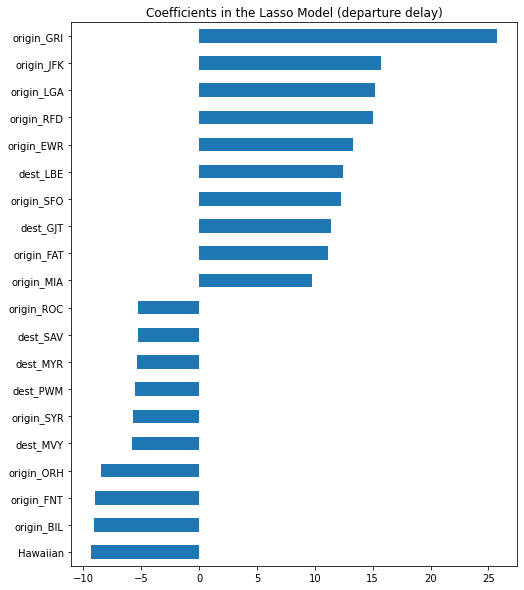

In [34]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model (departure delay)")

In [0]:
imp_coef.sort_values(ascending=False)

## Test MSE 

In [0]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, Y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error 
import math  
#model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_test, Y_test)
#rmse_cv(model_lasso).mean()
predict = model_lasso.predict(X_test)
MSE = np.square(np.subtract(Y_test,predict)).mean() 
math.sqrt(MSE)

30.300388976506706